In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
data= pd.read_csv(r"C:\Users\hp\OneDrive\Masaüstü\veri_klasörü\heart.csv")
data
                  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [25]:
# İlk 5 satırın görüntülenmesi
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [26]:
# son 5 satırın görüntülenmesi
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [27]:
# Satır ve sütun sayısına bakış
data.shape

(1025, 14)

In [28]:
# Özelliklere genel bakış
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [29]:
# Kayıp değerlerin kontrolü
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
# Özelliklerin istatistikleri
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [31]:
 #Tahmin etmeye çalışacağımız target özelliğinin dağılımı
data["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
#Verimizde 526 adet hasta, 499 adet hasta olmayan nesnemiz var.
#  Bu değerlerin birbirine yakın olması modelimiz açısından olumlu olacaktır.

In [32]:
# Özellikler ve etiketleri ayırma
x=data.drop(columns="target", axis=1)
y = data["target"]

In [33]:
# Özellikleri görüntüleme
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [34]:
# Etiketleri görüntüleme
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [36]:
# Veriyi train-test olarak ayırma
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((820, 13), (820,), (205, 13), (205,))

In [38]:
# Lojistik regresyonla modeli kurma
model=LogisticRegression()
model.fit(x_train,y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
# Modeli kullanarak test setiyle tahmin yapma
preds=model.predict(x_test)

In [40]:
# Test setiyle yaptığımız tahminleri accuracy score ile değerlendirme
accuracy_score(preds, y_test)

0.7853658536585366

In [ ]:
#modelin tahmin başarısı %78 


In [41]:
confusion_matrix(y_test, preds)

array([[71, 31],
       [13, 90]])

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [43]:
# Karar ağacı modelini oluşturma ve eğitme
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [44]:
tree_clf.predict(x_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [49]:
# Test seti üzerinde tahminler
y_pred_model=model.predict(x_test)



In [51]:
# Model performansını değerlendirme
accuracy_model= accuracy_score(y_test, y_pred_model)
report_model = classification_report(y_test, y_pred_model)

print("Accuracy (Logistic Regression):", accuracy_model)
print("Classification Report (Logistic Regression):\n", report_model)

Accuracy (Logistic Regression): 0.7853658536585366
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



In [53]:
# Test seti üzerinde tahminler
y_pred_tree = tree_clf.predict(x_test)



In [54]:
# Model performansını değerlendirme
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

print("accuracy (decision tree):", accuracy_tree)
print("classification Report (Decision tree):\n", report_tree)

accuracy (decision tree): 0.9853658536585366
classification Report (Decision tree):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [56]:
# For Logistic Regression
cm_model=confusion_matrix(y_test , y_pred_model)
# For Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_model)


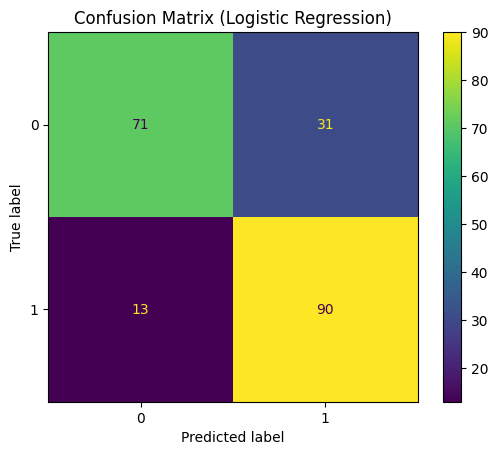

In [57]:
# For Logistic Regression
disp_model= ConfusionMatrixDisplay(confusion_matrix=cm_model ,display_labels=model.classes_)
disp_model.plot()
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

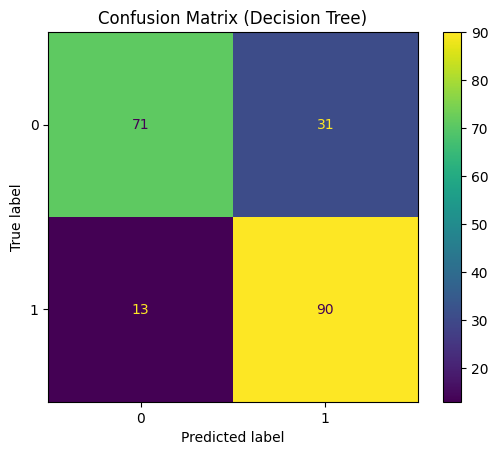

In [59]:
# For Decision Tree
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_model , display_labels=tree_clf.classes_)
disp_tree.plot()
plt.title("Confusion Matrix (Decision Tree)")
plt.show()


In [60]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


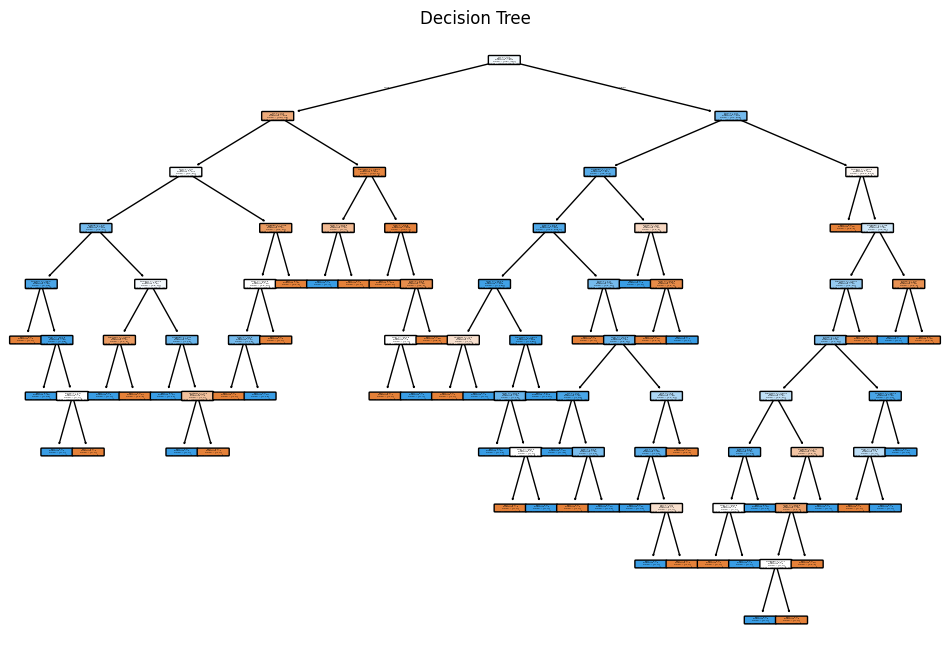

In [63]:
plt.figure(figsize=(12, 8))
plot_tree (tree_clf,
           feature_names=x.columns,
           class_names=["Kalp Hastalığı Var","Kalp hastalığı Yok"],
           filled=True,
           rounded=True)
plt.title("Decision Tree")
plt.show()